# Assignment 3 Unsupervised Learning - Clustering

In [66]:
#Importing basuc libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#importing data
data=pd.read_csv(r"C:\Users\USER\Downloads\Wholesale customers data.csv")

In [68]:
#Displaying first 5 observation
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [69]:
#dimensions of data
print("Dataset contains {} observations with {} features".format(data.shape[0],data.shape[1]))

Dataset contains 440 observations with 8 features


In [70]:
#basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [71]:
#statistical details
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [72]:
#checking for missing values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [73]:
#Scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster=data.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [74]:
#principle component analysis
from sklearn.decomposition import PCA
pca = PCA(2)
pca_result = pca.fit_transform(data_cluster)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 61.12%


## KMeans Clustering


In [75]:
#importing KMeans algorithm
from sklearn.cluster import KMeans

In [76]:
#calculating within cluster sum-of-squares
wcss=[]
import warnings
warnings.filterwarnings('ignore')
print("n_clusters\t\tInertia")
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmean.fit(pca_result)
    wcss.append(kmean.inertia_)
    print(i,"\t\t",kmean.inertia_)

n_clusters		Inertia
1 		 2151.589822364631
2 		 1278.1665563198871
3 		 883.1467729490764
4 		 600.6962960954108
5 		 421.3146175003162
6 		 343.6140463599711
7 		 292.1481420657555
8 		 250.9445273944243
9 		 211.33049701310597
10 		 189.84868843111255


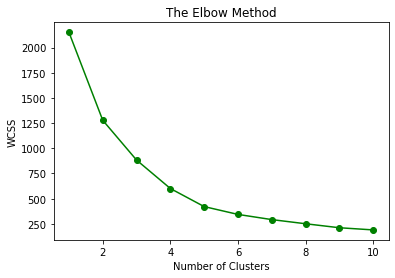

In [77]:
#plotting Elbow method
plt.plot(range(1,11),wcss,'o-',color="green")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [78]:
#silhouette score of KMeans clustering
kmean=KMeans(n_clusters=3,init="k-means++",random_state=42)
y_kmean=kmean.fit_predict(pca_result)
from sklearn import metrics
print('silhouette_score: ',metrics.silhouette_score(pca_result, y_kmean, metric='euclidean'))
km_three=pd.DataFrame(y_kmean, columns =['cluster'],index=data.index)
print(km_three.value_counts())

silhouette_score:  0.5537821054611747
cluster
0          299
1          128
2           13
dtype: int64


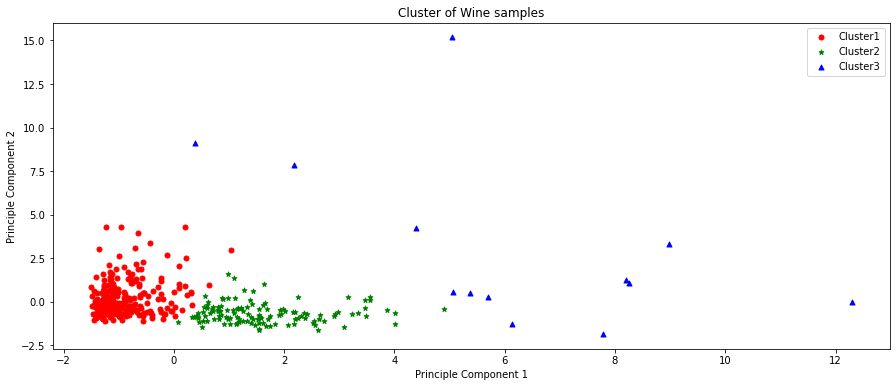

In [79]:
#plotting the clusters
plt.figure(figsize=(15,6))
plt.scatter(pca_result[y_kmean==0,0],pca_result[y_kmean==0,1],s=25,marker="o",color="red",label="Cluster1")
plt.scatter(pca_result[y_kmean==1,0],pca_result[y_kmean==1,1],s=25,marker="*",color="green",label="Cluster2")
plt.scatter(pca_result[y_kmean==2,0],pca_result[y_kmean==2,1],s=25,marker="^",color="blue",label="Cluster3")
plt.title("Cluster of Wine samples")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend(loc="best")
plt.show()

## Agglomerative Clustering

In [80]:
#importing agglomerative clustering
from sklearn.cluster import AgglomerativeClustering as ac

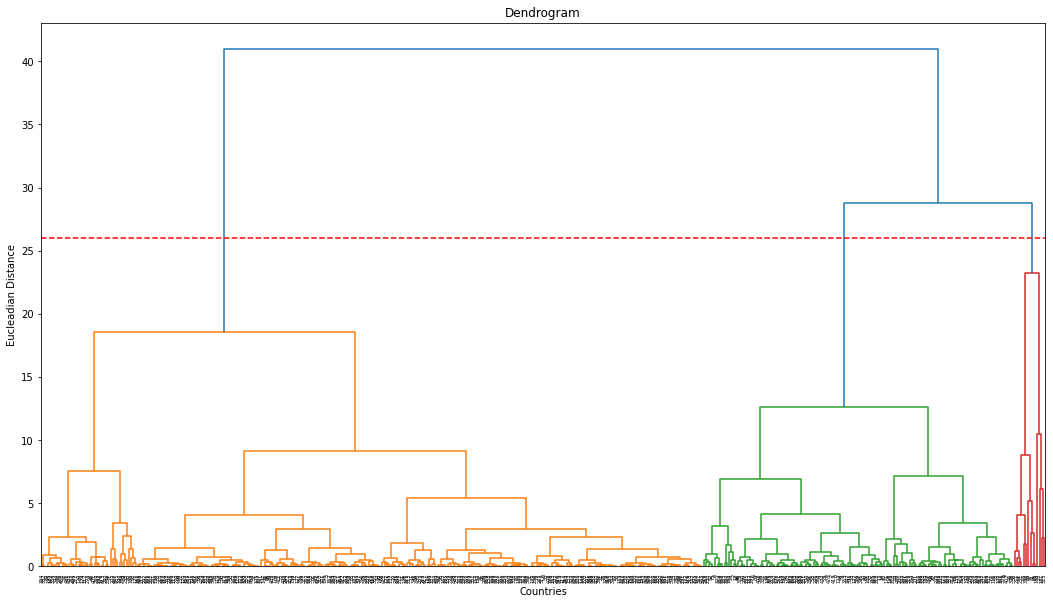

In [81]:
#plotting dendrogram
from scipy.cluster import hierarchy as sch
plt.figure(figsize=(18,10))
dend=sch.dendrogram(sch.linkage(pca_result,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Eucleadian Distance")
plt.hlines(26,0,27000,colors="red",linestyles="dashed")
plt.show()

In [82]:
#silhoette score of agglomerative clustering
ac1=ac(n_clusters=3,affinity="euclidean",linkage='ward')
y_ac=ac1.fit_predict(pca_result)
print('silhouette_score: ',metrics.silhouette_score(pca_result, y_ac, metric='euclidean'))
km_three=pd.DataFrame(y_ac, columns =['cluster'],index=data.index)
print(km_three.value_counts())

silhouette_score:  0.5401491383875402
cluster
1          290
2          136
0           14
dtype: int64


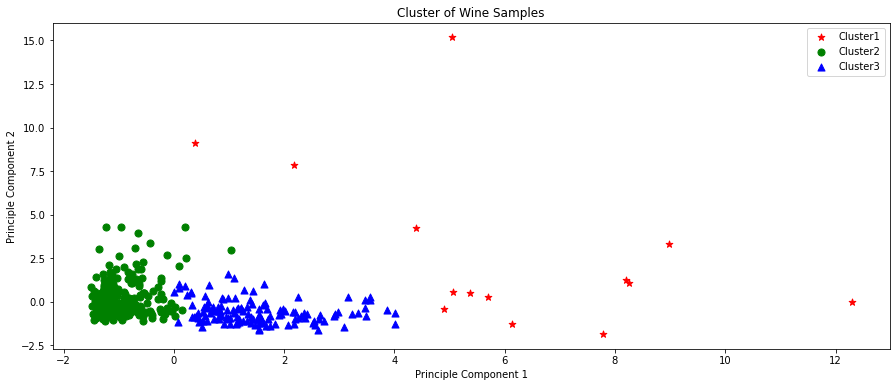

In [84]:
#plotting clusters
ac1=ac(n_clusters=3,affinity="euclidean",linkage='ward')
y_ac=ac1.fit_predict(pca_result)
plt.figure(figsize=(15,6))
plt.scatter(pca_result[y_ac==0,0],pca_result[y_ac==0,1],s=50,marker="*",color="red",label="Cluster1")
plt.scatter(pca_result[y_ac==1,0],pca_result[y_ac==1,1],s=50,marker="o",color="green",label="Cluster2")
plt.scatter(pca_result[y_ac==2,0],pca_result[y_ac==2,1],s=50,marker="^",color="blue",label="Cluster3")
plt.title("Cluster of Wine Samples")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend(loc="best")
plt.show()

#### From KMeans clustering and Agglomerative clustering the best number of clusters is 3